In [1]:
import pandas as pd

In [2]:
# Create a dataset with a list of times
raw_data = {'date': ['2014-06-01T01:21:38.004053', '2014-06-02T01:21:38.004053', '2014-06-03T01:21:38.004053'],
        'score': [25, 94, 57]}
df = pd.DataFrame(raw_data, columns = ['date', 'score'])
df

,date,score
0,2014-06-01T01:21:38.004053,25
1,2014-06-02T01:21:38.004053,94
2,2014-06-03T01:21:38.004053,57


In [3]:
# convert 'date' as string to datetime
df['date'] = pd.to_datetime(df['date'])

In [4]:
# set datetime as index
df = df.set_index(df['date'])
df

,date,score
date,,
2014-06-01 01:21:38.004053,2014-06-01 01:21:38.004053,25
2014-06-02 01:21:38.004053,2014-06-02 01:21:38.004053,94
2014-06-03 01:21:38.004053,2014-06-03 01:21:38.004053,57


In [5]:
df.index

DatetimeIndex(['2014-06-01 01:21:38.004053', '2014-06-02 01:21:38.004053',
               '2014-06-03 01:21:38.004053'],
              dtype='datetime64[ns]', name=u'date', freq=None)

In [6]:
# delete date colume
del df['date']

In [7]:
# View all observations that occured in 2014
df['2014']

,score
date,
2014-06-01 01:21:38.004053,25
2014-06-02 01:21:38.004053,94
2014-06-03 01:21:38.004053,57


In [9]:
# View all observations that occured in May 2014
df['2014-06']

,score
date,
2014-06-01 01:21:38.004053,25
2014-06-02 01:21:38.004053,94
2014-06-03 01:21:38.004053,57


In [11]:
from datetime import datetime
# Observations after Jun 2nd, 2014
df[datetime(2014,6,2):]

,score
date,
2014-06-02 01:21:38.004053,94
2014-06-03 01:21:38.004053,57


In [12]:
# Observations between Jun 2nd and Jun 3rd
df['2014-6-2':'2014-6-3']


,score
date,
2014-06-02 01:21:38.004053,94
2014-06-03 01:21:38.004053,57


In [13]:
# Observations between Jun 3rd and Jun 4th
df['6/3/2014':'6/4/2014']

,score
date,
2014-06-03 01:21:38.004053,57


In [14]:
# Truncation observations after Jun 2nd 2014
df.truncate(after='6/3/2014')

,score
date,
2014-06-01 01:21:38.004053,25
2014-06-02 01:21:38.004053,94


In [15]:
#Observations of June 2014
df.ix['6/2014']

,score
date,
2014-06-01 01:21:38.004053,25
2014-06-02 01:21:38.004053,94
2014-06-03 01:21:38.004053,57


In [16]:
# Count the number of observations per timestamp
df.groupby(level=0).count()

,score
date,
2014-06-01 01:21:38.004053,1
2014-06-02 01:21:38.004053,1
2014-06-03 01:21:38.004053,1


In [19]:
# Mean value of score per day
df.resample('D').mean()

,score
date,
2014-06-01,25
2014-06-02,94
2014-06-03,57


In [20]:
# Total value of score per day
df.resample('D').sum()

,score
date,
2014-06-01,25
2014-06-02,94
2014-06-03,57


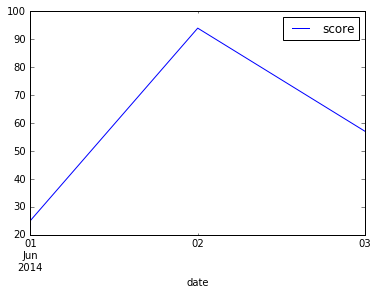

In [21]:
# Plot of the total score per day
%matplotlib inline
import matplotlib.pyplot as pyplot

df.resample('D').sum().plot()